In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("F:/Data Analysis/Kaggle Datasets/Database_TMDb_movie_data/tmdb-movies.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# # Removing unnecessary columns in the analysis

In [4]:
df.drop(['homepage', 'tagline', 'keywords', 'overview', 'imdb_id', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


## Remove the NaN rows in the director column, because they will influence in analysis

In [6]:
df.dropna(subset=['director'], inplace=True)

## Replace the Null rows By Fillna method


In [7]:
df.fillna(method="ffill", inplace=True)

## Convert  release_date dtype from object to datatime 

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10822 non-null  int64         
 1   popularity            10822 non-null  float64       
 2   budget                10822 non-null  int64         
 3   revenue               10822 non-null  int64         
 4   original_title        10822 non-null  object        
 5   cast                  10822 non-null  object        
 6   director              10822 non-null  object        
 7   runtime               10822 non-null  int64         
 8   genres                10822 non-null  object        
 9   production_companies  10822 non-null  object        
 10  release_date          10822 non-null  datetime64[ns]
 11  vote_count            10822 non-null  int64         
 12  vote_average          10822 non-null  float64       
 13  release_year    

In [10]:
hig_rel_year = df.groupby('release_year').count()['id'].sort_values()

In [11]:
hig_rel_year.tail()

release_year
2011    539
2012    584
2015    626
2013    655
2014    695
Name: id, dtype: int64

In [12]:
hig_rel_year.head()

release_year
1961    31
1969    31
1960    32
1962    32
1963    34
Name: id, dtype: int64

In [13]:
df['Profit'] = df['revenue'] - df['budget']

In [14]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360


In [15]:
df['Profit'].max()

2544505847

In [16]:
genre_details = list(map(str,(df['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy',
         'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance',
         'TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 
         'Horror', 'Documentary', 'Foreign']

In [17]:
year = np.array(df['release_year'])
popularity = np.array(df['popularity'])

In [18]:
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))

In [19]:
popularity_df = popularity_df.fillna(value = 0.0)

In [20]:
z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [21]:
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.753047,1.338265,1.996432,1.398764,0.550490,1.124313,0.951448,1.817151,1.534066,1.097634,...,0.608896,0.524524,0.756558,0.976788,1.025347,0.586531,0.729227,0.748847,1.177602,1.614316
Science Fiction,-0.467064,-0.361952,-0.640003,-0.646572,-0.667888,-0.869288,0.097082,-0.631167,1.452081,-0.710447,...,-0.285369,-0.321169,0.083849,0.678498,-0.088142,0.212190,0.188694,0.572097,0.905714,1.231855
Fantasy,-0.528631,-0.744050,-0.691929,-0.895883,-0.012691,-0.992961,-0.585750,-0.703081,-0.055098,-0.771756,...,0.064256,0.326520,0.010130,0.179178,0.147091,0.028815,0.080229,-0.185968,-0.107530,-0.320464
Crime,-0.607773,-0.111525,-0.192078,-0.020849,0.082887,-0.523188,-0.034184,0.518415,0.209143,0.593035,...,0.085715,0.306293,0.299702,-0.394355,-0.158094,-0.059807,0.091479,0.348091,-0.218414,0.027207
Western,0.705451,-0.588007,-0.266409,-0.863575,-1.009777,-0.527569,-0.028313,-0.772219,-0.824684,0.996730,...,-1.032584,-1.020988,-1.056953,-1.110397,-0.972246,-0.992153,-0.866103,-0.972523,-0.923792,-0.759165


In [22]:
popular_genre.idxmax()

1960        Drama
1961        Drama
1962        Drama
1963     Thriller
1964       Comedy
1965        Drama
1966        Drama
1967        Drama
1968        Drama
1969        Drama
1970        Drama
1971        Drama
1972        Drama
1973        Drama
1974        Drama
1975        Drama
1976        Drama
1977    Adventure
1978        Drama
1979        Drama
1980       Action
1981    Adventure
1982        Drama
1983       Action
1984       Action
1985       Comedy
1986        Drama
1987       Comedy
1988       Comedy
1989       Comedy
1990        Drama
1991       Comedy
1992       Comedy
1993        Drama
1994        Drama
1995        Drama
1996        Drama
1997     Thriller
1998        Drama
1999        Drama
2000       Comedy
2001        Drama
2002        Drama
2003       Action
2004       Comedy
2005        Drama
2006        Drama
2007        Drama
2008        Drama
2009        Drama
2010        Drama
2011        Drama
2012        Drama
2013        Drama
2014        Drama
2015      

In [23]:
df[df.vote_average == df.vote_average.max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
3894,125336,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,Blue Sky Studios,2011-09-03,14,9.2,2011,0


In [24]:
df[df.vote_average == df.vote_average.min()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
7772,25055,0.121120,0,0,Transmorphers,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...,Leigh Scott,86,Action|Adventure|Science Fiction,"Asylum, The",2007-06-26,10,1.5,2007,0
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,1966-11-15,15,1.5,1966,-19000


In [25]:
df[df.Profit == df.Profit.max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2544505847


In [26]:
df[df.Profit == df.Profit.min()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,-413912431


In [27]:
df[df.runtime == df.runtime.max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
3894,125336,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,Blue Sky Studios,2011-09-03,14,9.2,2011,0


In [28]:
df[df.runtime == df.runtime.min()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015,0
410,339342,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,Depth of Field|1821 Pictures,2015-01-01,15,5.6,2015,0
445,353345,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,2015-10-09,52,5.0,2015,0
486,333653,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,2015-04-05,11,5.4,2015,0
595,341051,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,Salon Pictures,2015-01-01,11,4.6,2015,0
616,325843,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,Johnson Production Group|Shadowland,2015-11-10,20,6.6,2015,0
1289,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014,-3250000
1293,286256,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,2014-10-30,14,6.0,2014,0
1849,18247,0.120350,0,0,Spectacular!,Nolan Gerard Funk|Jesse Moss|Britt Irvin|Tammi...,Robert Iscove,0,Drama|Music,Pacific Productions,2009-02-16,13,5.2,2009,0


In [29]:
df['runtime'] = df['runtime'].replace(0,np.NAN)

In [30]:
df[df.runtime == df.runtime.min()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
4883,142563,0.078472,0,0,Fresh Guacamole,Emanuelle Carriere|Christine Emes|Celine Filio...,PES,2.0,Animation,Dudez Productions,2012-03-02,29,7.9,2012,0
4890,126909,0.083202,0,0,Cousin Ben Troop Screening,Jason Schwartzman,Wes Anderson,2.0,Documentary,Preferred Content,2012-01-01,14,7.0,2012,0
7905,13924,0.647261,0,0,The Adventures of AndrÃ© and Wally B.,Faye Dunaway|Helen Slater|Peter O'Toole|Hart B...,Alvy Ray Smith,2.0,Animation,Lucasfilm|Pixar Animation Studios,1984-12-17,32,5.3,1984,0
10550,13925,0.306425,0,0,Luxo Jr.,Bryan Brown|Brian Dennehy|Diane Venora|Cliff D...,John Lasseter,2.0,Animation|Family,Pixar Animation Studios,1986-08-17,81,7.3,1986,0
10754,3171,0.002757,0,0,Bambi Meets Godzilla,Sid James|Charles Hawtrey|Joan Sims|Kenneth Wi...,Marv Newland,2.0,Animation|Comedy,The Rank Organisation,1969-01-01,12,5.6,1969,0


In [31]:
df.groupby('release_year')

In [32]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360


In [33]:
grouped_df = df.groupby("release_year")['vote_average']

In [34]:
grouped_df.max()

release_year
1960    8.0
1961    7.5
1962    7.7
1963    7.5
1964    7.7
1965    7.6
1966    7.9
1967    7.6
1968    7.7
1969    7.3
1970    7.6
1971    7.7
1972    8.3
1973    7.7
1974    8.1
1975    8.0
1976    7.8
1977    7.9
1978    8.0
1979    7.8
1980    8.0
1981    8.5
1982    7.9
1983    8.1
1984    8.4
1985    8.3
1986    8.0
1987    7.7
1988    8.0
1989    8.4
1990    8.0
1991    7.9
1992    8.4
1993    8.1
1994    8.4
1995    8.5
1996    7.9
1997    7.8
1998    8.0
1999    8.1
2000    8.5
2001    8.0
2002    8.3
2003    8.0
2004    7.8
2005    8.3
2006    8.7
2007    7.9
2008    8.3
2009    8.3
2010    8.8
2011    9.2
2012    8.3
2013    8.5
2014    8.8
2015    8.9
Name: vote_average, dtype: float64

In [35]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360


In [36]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,Profit
id,1.000000,-0.012486,-0.140393,-0.098485,-0.076322,-0.034447,-0.063202,0.511312,-0.074370
popularity,-0.012486,1.000000,0.545048,0.663178,0.139059,0.800748,0.212370,0.091028,0.628885
budget,-0.140393,0.545048,1.000000,0.734756,0.192814,0.632481,0.083105,0.117131,0.570019
revenue,-0.098485,0.663178,0.734756,1.000000,0.164674,0.791076,0.174508,0.057862,0.976164
runtime,-0.076322,0.139059,0.192814,0.164674,1.000000,0.165157,0.161993,-0.111882,0.137770
vote_count,-0.034447,0.800748,0.632481,0.791076,0.165157,1.000000,0.256099,0.108870,0.755827
vote_average,-0.063202,0.212370,0.083105,0.174508,0.161993,0.256099,1.000000,-0.120565,0.184783
release_year,0.511312,0.091028,0.117131,0.057862,-0.111882,0.108870,-0.120565,1.000000,0.032608
Profit,-0.074370,0.628885,0.570019,0.976164,0.137770,0.755827,0.184783,0.032608,1.000000


In [37]:
month_release = df['release_date'].dt.month

In [38]:
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

In [39]:
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

Text(0, 0.5, 'Number of movie releases')

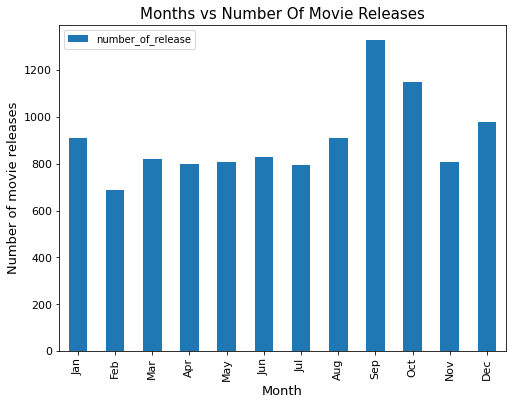

In [40]:
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)

In [41]:
def count_na(i):
    data1 = df[i].str.cat(sep = '|')
    data2 = pd.Series(data1.split('|'))
    info = data2.value_counts(ascending=False)
    return info

In [42]:
production_companies = count_na('production_companies')

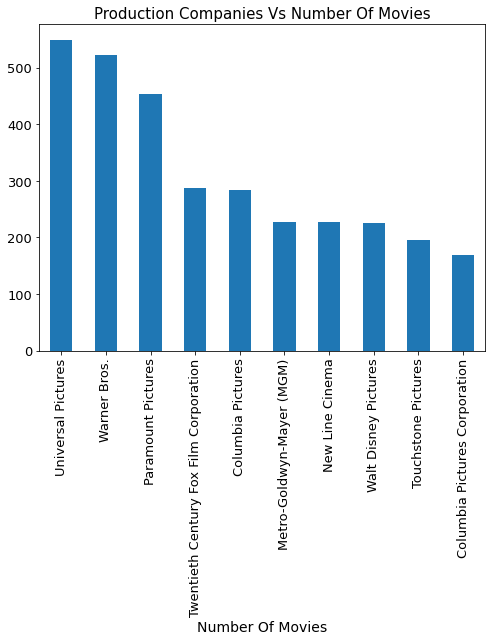

In [43]:
production_companies.iloc[:10].plot(kind='bar',figsize=(8,6),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
plt.show()

In [44]:
production_companies

Universal Pictures                        549
Warner Bros.                              523
Paramount Pictures                        453
Twentieth Century Fox Film Corporation    288
Columbia Pictures                         284
                                         ... 
Gearhead Pictures                           1
Lol Productions                             1
Taryn Prov                                  1
Unjustus Films                              1
Prom Night Productions                      1
Length: 7867, dtype: int64

Correlation Between Revenue And Budget :  0.6885179716225603


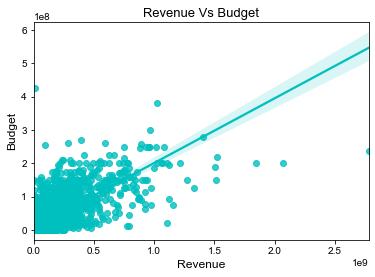

In [64]:
ax = sns.regplot(x=df['revenue'], y=df['budget'],color='c')
ax.set_title("Revenue Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

df['budget'] = df['budget'].replace(0,np.NAN)
df['revenue'] = df['revenue'].replace(0,np.NAN)
df['Profit'] = df['Profit'].replace(0,np.NAN)

data_corr = df.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])

Correlation Between Release Year And Vote Average :  -0.12056518481297653


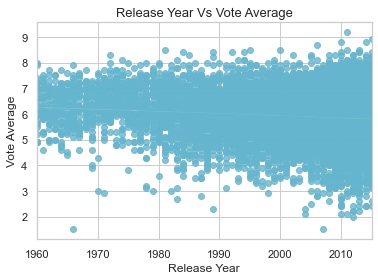

In [65]:
ax = sns.regplot(x=df['release_year'], y=df['vote_average'],color='c')

ax.set_title("Release Year Vs Vote Average",fontsize=13)
ax.set_xlabel("Release Year",fontsize=12)
ax.set_ylabel("Vote Average",fontsize=12)

sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")
print("Correlation Between Release Year And Vote Average : ",data_corr.loc['release_year','vote_average'])

In [48]:
df.to_csv("tmdb_clean_data.csv")